In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the datset.
df = pd.read_csv('car_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#check for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
#check the categorical data.
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [8]:
#change categorical data into numerical value.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Fuel_Type"] = le.fit_transform(df["Fuel_Type"])

In [10]:
df["Selling_type"] = le.fit_transform(df["Selling_type"])

In [11]:
df["Transmission"] = le.fit_transform(df["Transmission"])

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [14]:
#splitting the data and target.

x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [15]:
print(x)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          2             0             1   
1    2013           9.54       43000          1             0             1   
2    2017           9.85        6900          2             0             1   
3    2011           4.15        5200          2             0             1   
4    2014           6.87       42450          1             0             1   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             1   
297  2015           5.90       60000          2             0             1   
298  2009          11.00       87934          2             0             1   
299  2017          12.50        9000          1             0             1   
300  2016           5.90        5464          2             0             1   

     Owner  
0        0  
1        0  
2        0  

In [16]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [17]:
# splitting data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state = 2)

# Model training

1.Linear Regression

In [19]:
#loading linear regression model.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

# Model Evalution.

In [20]:
#prediction on training data.
train_pred = lr.predict(x_train)

In [21]:
#R squared Error.

from sklearn import metrics
error_score = metrics.r2_score(y_train,train_pred)
print('TR squared error :', error_score)

TR squared error : 0.8796483009370211


Text(0.5, 1.0, 'Actual price VS Predicted price')

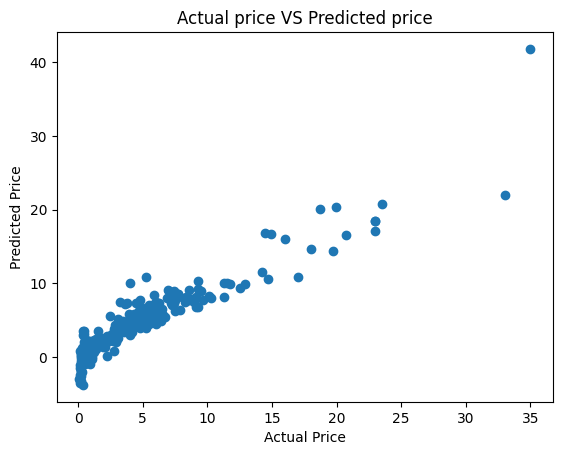

In [22]:
#visualize the actual price and predicted prices.

plt.scatter(y_train,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price VS Predicted price")

In [25]:
#prediction on training data.
train_pred = lr.predict(x_test)

In [26]:
#R squared Error.

error_score = metrics.r2_score(y_test,train_pred)
print('TR squared error :', error_score)

TR squared error : 0.8365861023209593


Text(0.5, 1.0, 'Actual price VS Predicted price')

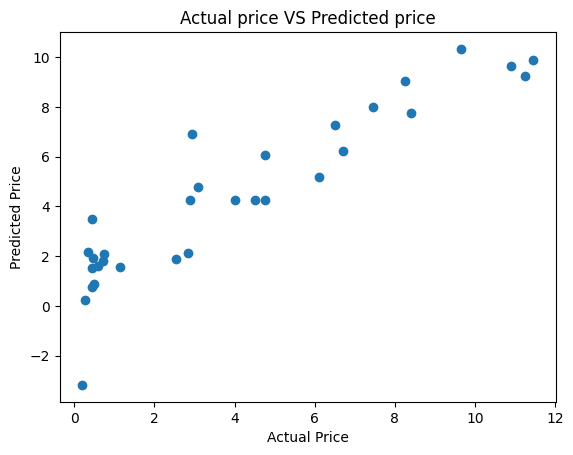

In [27]:
plt.scatter(y_test,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price VS Predicted price")

2.Lasso Regression.

In [29]:
#loading on training data.

from sklearn.linear_model import Lasso
lass = Lasso()

In [30]:
lass.fit(x_train,y_train)

Lasso()

# Model evalution

In [32]:
#prediction on training data.
train_pred = lass.predict(x_train)

In [33]:
#R squared Error.

error_score = metrics.r2_score(y_train,train_pred)
print('TR squared error :', error_score)

TR squared error : 0.842448071824074


Text(0.5, 1.0, 'Actual price VS Predicted price')

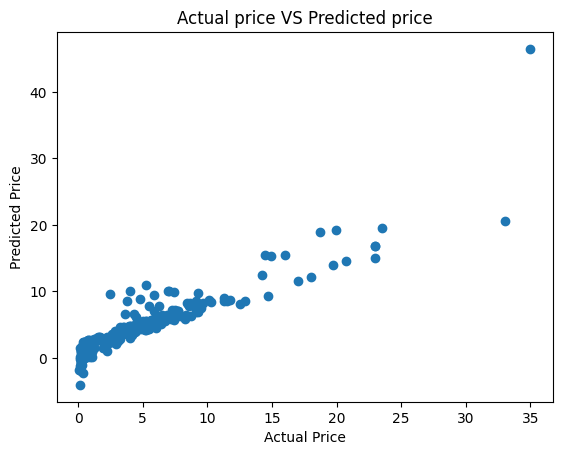

In [34]:
#visualize the actual price and predicted prices.

plt.scatter(y_train,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price VS Predicted price")

In [35]:
#prediction on training data.
train_pred = lass.predict(x_test)

In [36]:
#R squared Error.

error_score = metrics.r2_score(y_test,train_pred)
print('TR squared error :', error_score)

TR squared error : 0.8709763132343402


Text(0.5, 1.0, 'Actual price VS Predicted price')

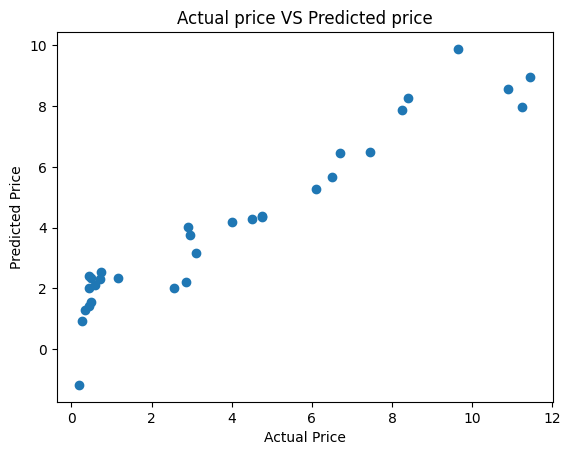

In [41]:
#visualize the actual price and predicted prices.

plt.scatter(y_test,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price VS Predicted price")